# [Public Policy 275] Spatial Data and Analysis, Fall 2022

# Lab 4: Lines, Polygons and Networks

* University of California, Berkeley
* Instructor: Solomon Hsiang
* GSIs: Simon Greenhill and Hikari Murayama

**About This Lab**
* Due Date: September 20, 2022, 11:59 pm
* You may talk with other students about the lab, but each student is responsible for doing all exercises in the lab themselves and turning in their own write up. We will be checking code for evidence of copying and pasting.
* When you are done with the lab, please restart the kernel and run all the cells one more time (press the ">>" button), so that the grader will see a clean notebook. Don't forget to save! Please submit this lab to bCourses as `YOURCAL1ID.ipynb`. This will facilitate anonymous grading.
* This lab requires that you download the following files and place them in the same directory as this jupyter notebook:
    * `Lab4_hawaii.p`
    * `Lab4_network.p`
* These labs have been developed over the years by Solomon Hsiang, and past/current GSIs including Ian Bolliger, Tamma Carleton, Shubham Goel, Felipe González, Luna Yue Huang, Jonathan Kadish, Jaecheol Lee, and Jonathan Proctor (in alphabetical order).

## Objectives
By the end of this lab, you will be able to
1. Use `shapely`
2. Use `geopandas`

## Setup
Make sure you can successfully run the next cell. This will ensure you have the necessary packages for this lab. (They should be installed already if you followed our setup instructions at the beginning of the term.)

In [1]:
import pickle
import numpy as np
import pandas as pd
import shapely
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon
from shapely.affinity import scale
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
%matplotlib inline

## [lat, lon] or [lon, lat]?
Usually we use x to denote the horizontal dimension and y the vertical dimension. However, in this lab, we will start working with Latitude and Longitude: lat is the vertical dimension and lon is the horizontal dimension, so when we write `[lat, lon]`, the order in which we write the horizontal and vertical dimensions has switched. This is no big deal, but we always have to be aware of which convention we are using. Most functions will expect you to write inputs using the x-y convention where the horizontal dimension is listed first and some will expect you to use the lat-lon convention with the vertical dimension is listed first. You cannot be too careful with this as errors here can potentially have large implications (e.g., it may result in mismatched data). In the following exercises, we will try to point out which commands don't use the x-y convention. When you are coding, you should always be aware of this - when in doubt, remember to always plot your maps and visually verify that it is correct. If your map looks strange, make sure to check that the arguments of your function are in the right order. When you are matching data and if you are worried about messing up the indexes, always try to use existing functions first and do not code things up by yourself unless it's necessary.

Below, we're going to work mainly with data sets that contain lat-lon data, but we'll be using many commands that use the x-y convention. This means that you will often type `[lon, lat]` instead of `[lat, lon]`.

## 1. Plotting Polygons
Let's start by constructing some `shapely` objects. As you can imagine, one of the most commonly used class is `shapely.geometry.Polygon`. In the following code block, I will be constructing two polygons, `triangle` and `rectangles`, using a lat-lon coordinate system.

In [3]:
# to construct polygons in shapely we feed the Polygon() function a list of 
# (lat, lon) coordinates. 
# The important part is that the last point should be the same as the first point
# because otherwise the polygon is not closed
triangle = Polygon([(1, 2), (8, 4), (5, 10), (1, 2)])

# Polygons cannot contain multiple polygons--for that we have the class MultiPolygon.
# But a polygon can have holes, and lots of them
rectangles = Polygon(
    # these are the exterior coordinates
    [(2.5, 7), (9, 7), (9, 12), (2.5, 12), (2.5, 7)],
    # these are the interior coordinates (the holes)
    [[(3, 8), (4, 8), (4, 9), (3, 9), (3, 8)],
     [(7, 10), (8, 10), (8, 11), (7, 11), (7, 10)]])

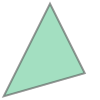

In [4]:
# shapely is nicely integrated with Jupyter Notebook
# so this will quickly plot the polygon
triangle

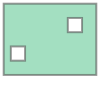

In [5]:
rectangles

### 1.1 Plot the polygons we just created as a single figure.
Following the steps below, produce a single figure. Plotting with `matplotlib` is not always the easiest solution when you try to plot shapefiles, and this will become more obvious when we start talking about `geopandas`, but this exercise hopefully offers a nice view into the mechanics of plotting polygons in Python.

* Plot the triangle polygon as a black dotted line. Be careful because `plt.plot()` assumes an x-y coordinate system (see above). You will notice that the plots above are transposed as shapely defaults to the x-y coordinate system as well.
* On the same figure, plot the rectangle as solid red lines.
* To interact with `plt.plot()` you will likely need to look up `shapely.geometry.Polygon.exterior.xy` in order to plot the exterior boundaries. Figure out how to plot the interior boundaries. Hint: there are multiple interior boundaries. Another hint: `dir()` (returns all the attributes and methods defined on a class) and `type()` (returns the class of the object) and `len()` (returns the length of the object, however that is defined) are the most useful functions for figuring out how to interact with certain objects in Python.
* Label the triangle "Triangle" using the command `plt.text()`. This command allows you to place text anywhere you want on the figure. Put the label somewhere sensible and visually unobstructed. Label the rectangle "Rectangle".
* Create a "buffer" around the triangle that is 1 unit wide. This buffer is also a polygon which simply describes the set of points that are exactly 1 unit away from the edge of the triangle at the nearest point in the triangle. Writing code to find this buffer polygon is difficult, but luckily shapely has a built-in method `buffer` that will do it for you. Plot the buffer around the triangle with black solid line. Note that we have not assigned our polygons a CRS yet, so the units could be anything (degrees, miles, etc.)

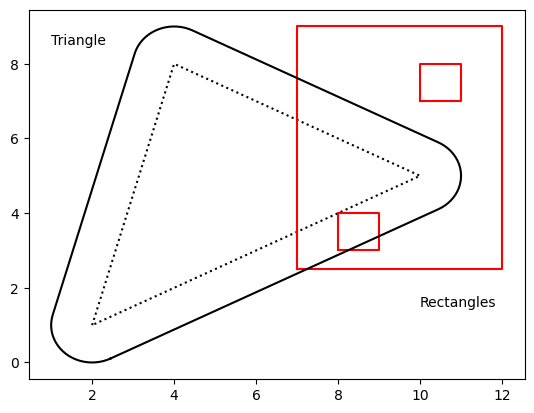

In [6]:
# TODO: WRITE YOUR CODE HERE
# plot the triangle
lat, lon = triangle.exterior.xy
plt.plot(lon, lat, 'k:')
# plot the exterior of the rectangle
lat, lon = rectangles.exterior.xy
plt.plot(lon, lat, 'r-')
# plot the interiors of the rectangle
for interior in rectangles.interiors:
    lat, lon = interior.xy
    plt.plot(lon, lat, 'r-')
# plot the buffer around the triangle
lat, lon = triangle.buffer(1).exterior.xy
plt.plot(lon, lat, 'k-')
# add text
plt.text(1, 8.5, 'Triangle')
plt.text(10, 1.5, 'Rectangles')
plt.show()

### 1.2. Plot the union and the intersection of our polygons

In a new figure with two subplots, plot the union of the triangle and rectangles (in one subplot) and the intersection of the triangle and rectangles (in the other subplot). This will require you to calculate the union and intersection first, and then plot. Make sure they are labeled or titled so that it is clear which is which.

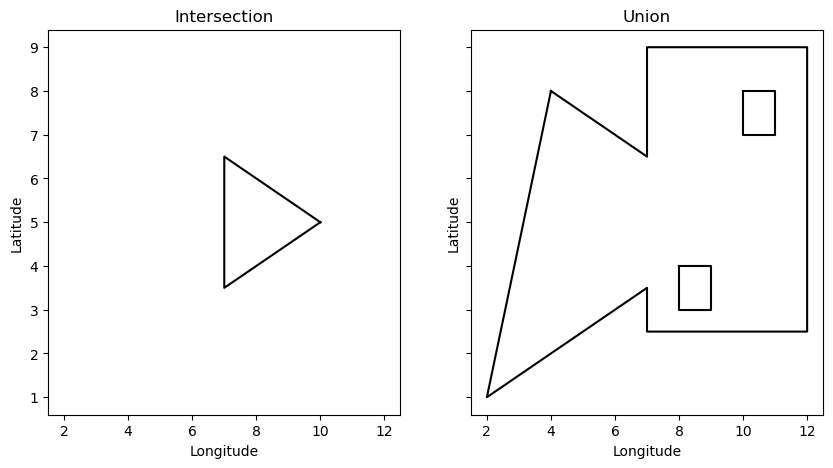

In [7]:
# TODO: WRITE YOUR CODE HERE
fig, (ax0, ax1) = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(10, 5))

# left plot
poly = triangle.intersection(rectangles)
lat, lon = poly.exterior.xy
ax0.plot(lon, lat, 'k-')
ax0.set_xlabel('Longitude')
ax0.set_ylabel('Latitude')
ax0.set_title('Intersection')

# right plot
poly = triangle.union(rectangles)
lat, lon = poly.exterior.xy
ax1.plot(lon, lat, 'k-')
for interior in poly.interiors:
    lat, lon = interior.xy
    ax1.plot(lon, lat, 'k-')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('Union')
plt.show()

## 2. Baywatch Hawaii

As a coast-guard planner for the state of Hawaii, you are asked to evaluate whether (and if so, where) your team should construct additional fast-response rescue heliports. Currently, there is a single fast-response heliport in Oahu (the capital city) and it would be great if the state could rely on only that station because it's expensive to build additional ports. However, your team’s mandate is to make sure that surfers and recreational fishing boats (which may be as far as 20km off any coast) can be reached by a fast response helicopter. These helicopters can fly a distance of 600 km, but they need to get back to their starting point so their effective rescue range is only 300 km. Your task is to determine if there are any vulnerable regions of coastline (out to 20 km) that cannot be reached by the current heliport in Oahu – and if so, where a should additional heliports be built?

### 2.1. Examine the data visually.

The data you need are in the file `Lab4_hawaii.p`. This file contains some polygons for the state of Hawaii. There are multiple polygons because the islands making up the Hawaiian archipelago are not contiguous. The file also contains data on the location of Oahu. Because the boundaries are complex in structure, the file uses many points to describe the structure of the islands, making maps accurate but making the data difficult to examine by eye. **Begin by examining the data. How many separate polygons are there?** Write code to count the polygons and report the number of polygons.

Hint: The polygons are of the class `shapely.geometry.MultiPolygon`. For many objects you can use the generic functions to learn about their properties: `dir()`, `len()` (for length), and `type()`.

In [2]:
# TODO: WRITE YOUR CODES HERE
with open('Lab4_hawaii.p', 'rb') as f:
    d = pickle.load(f)
hawaii = d['hawaii']
oahu = d['oahu']
print('Number of polygons: {}'.format(len(hawaii.geoms)))

Number of polygons: 27


### 2.2. Calculate 20km in degrees of longitude

**Calculate the approximate number of degrees of longitude that would equal the flight range of a helicopter leaving Oahu** (Hints: this doesn't require Python, but if you use Python you may need the function `numpy.cos()`. Note that this function takes inputs in radians, not degrees. Check out `np.deg2rad`, or do the conversion yourself by multiplying by $\pi$ and dividing by 180). Also **calculate the number of degrees of longitude that would equal 20 km**, the off-coast distance that your helicopter team must monitor.

In [3]:
# TODO: ANSWER THE QUESTION HERE
one_degree_in_km = 111 * np.cos(oahu['lat'] / 180 * np.pi)
range_lon = 300 / one_degree_in_km
buffer_lon = 20 / one_degree_in_km
print('The approximate number of degrees of longitude '
      'that would equal the flight range of a helicopter: {:.2f} degrees'
      .format(range_lon))
print('The number of degrees of longitude '
      'that would equal the off-coast distance that '
      'your helicopter team must monitor: {:.2f} degrees'
      .format(buffer_lon))

The approximate number of degrees of longitude that would equal the flight range of a helicopter: 2.90 degrees
The number of degrees of longitude that would equal the off-coast distance that your helicopter team must monitor: 0.19 degrees


### 2.3 Make some plots of Hawaii.

#### 2.3.1

Plot the boundaries of the islands the same way that you plotted the rectangles in the first problem (hint: these islands don't have holes). Use a new color that we haven't used in any of the previous exercises. Then, mark Oahu with a different new color.

**How to use RGB color vectors**: Rather than specify colors using strings (e.g. 'b' for blue) use a three element vector that describes the amount of red, green and blue (RGB) that you want to 'mix together' (imagine you are a painter) to make the color you want. This color vector must have three elements and each must be between zero and one (inclusive). The first entry describes how much red you want, the second describes how much green, and the last describes how much blue. For example, if you were to type `plt.plot(x, y, c=(1, 0, 0))` then you would get a plot with a red line (the parameter `c` tells Python that you want to alter the color option for the line and that the next vector you list will be a RGB vector). If you were to type `plt.plot(x, y, c=(0, 1, 0))` you would get a green line and if you type `plt.plot(x, y, c=(.5, .6, 0))` you would get something in between red and green, with slightly more green than red. Under this RGB system, if the three elements are the same value, then Python plots a shade of grey, with `(0, 0, 0)` equal to black and `(1, 1, 1)` equal to white.

A good graph starts with a carefully selected palette. From now on, we will not be telling you what color to use for which graph, select the ones that make you the happiest! One important thing to keep in mind is that you would want your color palette to be color blind safe. The [ColorBrewer](http://colorbrewer2.org) website provides some useful resources for this.

#### 2.3.2

Make a new polygon that shows the limit of a helicopter's range if it were to leave from the heliport in Oahu. **Plot this polygon on your map of Hawaii.** Be thoughtful in your color selection.

Some tips:

* `shapely` records all geometric shapes as polygons, so we cannot actually create perfect circles. This is fine though. A quick way to create a circle in `shapely` is to create a `buffer` around a `Point`.
* Thinking about it more, do we really want to create a circle? 1 km is does not represent the same number of degrees in longitude and latitude. So we want an ellipse. This can be achieved by transforming the circle (by using `shapely.affinity.scale`).

#### 2.3.3

Compute the boundary of the region that your helicopter team must cover (all ocean within 20 km of the coastline). Because the coastline of the islands are complex, this calculation may take a little bit of time for Python to compute (in Jupyter Notebook you will see `In  [*]:`, with the star meaning that Python is working on this). Plot this boundary.

Because it takes a bit of time to run this calculation, once Python finishes, you should save the output so that you don't have to run this again. Save this as `Lab4_hawaii_buffer.p` with `pickle`. Hint: this is similar to what you would do when reading data except that (1) the 'rb' argument in `open()` should be changed to 'wb' and (2) we will use `pickle.dump()` instead of `pickle.load()`.

#### 2.3.4

Will the single helipad in Oahu be able to provide coverage for all of the coastal waters ($\le$ 20 km) around Hawaii? If not, isolate regions of coastal waters that do not have coverage (Hint: you will want to use the `shapely.geometry.Polygon.difference()` method). Use the function `plt.fill()` to plot these regions as filled-in polygons on your map (using a thoughtful color). Make sure your map (containing all the objects so far) looks nice and is well labeled because it is the figure you will use to make your case to the state government on whether or not the state needs to construct a new heliport.

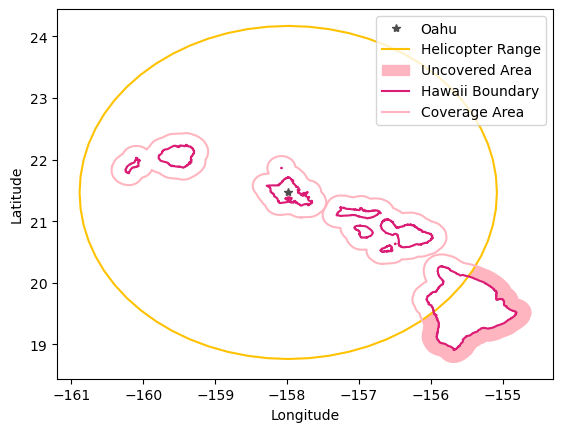

In [ ]:
# TODO: WRITE YOUR CODE HERE
# construct the circle first
ellipse = Point(oahu['lat'], oahu['lon']).buffer(300 / 111)
# then scale it to be an ellipse
ellipse = scale(ellipse, yfact=1 / np.cos(oahu['lat'] / 180 * np.pi))

# construct the buffer areas
hawaii_buffer = hawaii.buffer(buffer_lon)
with open('Lab4_hawaii_buffer.p', 'wb') as f:
    pickle.dump(hawaii_buffer, f)

# compute uncovered areas
coastal = hawaii_buffer.difference(hawaii)
uncovered = coastal.difference(ellipse)

# plot the map
plt.plot(oahu['lon'], oahu['lat'],
         c=(.3, .3, .3), marker='*', linestyle='None',
         label='Oahu')
lat, lon = ellipse.exterior.xy
plt.plot(lon, lat, c=(1, .76, 0), label='Helicopter Range')
lat, lon = uncovered.exterior.xy
plt.fill(lon, lat, c=(1, .71, .75), label='Uncovered Area')
for poly in hawaii.geoms:
    lat, lon = poly.exterior.xy
    plt.plot(lon, lat, c=(.86, .11, .46))
plt.plot([], [], c=(.86, .11, .46), label='Hawaii Boundary')
for poly in hawaii_buffer.geoms:
    lat, lon = poly.exterior.xy
    plt.plot(lon, lat, c=(1, .71, .75))
plt.plot([], [], c=(1, .71, .75), label='Coverage Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### 2.4. Where should new heliports go, if anywhere?

If you think that one or more heliports are required to ensure that all the coastal waters can be reached by a fast-response helicopter, propose locations where you think new heliports should be constructed to ensure complete coverage. (Hint: this does not have to be optimized. `plt.grid()` may help you in determining the coordinates of the desired site.) Construct a new well-labeled map with the coverage regions for Oahu and your proposed heliport locations overlaid to convince decision-makers that complete coverage of coastal waters can be achieved under your proposed plan. If you think it is an effective display, you could plot the union of multiple heliport coverage regions to show the total covered area.

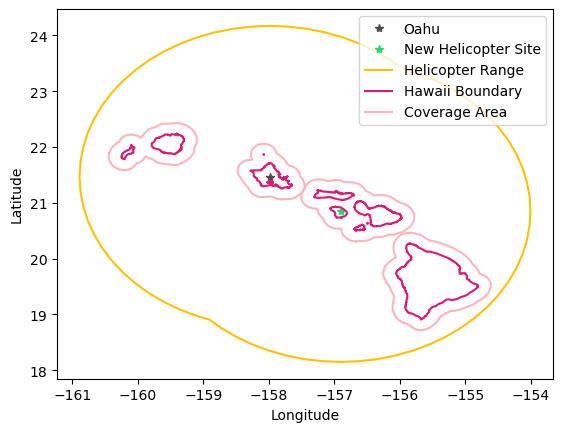

In [22]:
# TODO: WRITE YOUR CODE HERE
# proposed new site
new = {'lat': 20.85, 'lon': -156.9}
new_ellipse = Point(new['lat'], new['lon']).buffer(300 / 111)
new_ellipse = scale(new_ellipse, yfact=1 / np.cos(new['lat'] / 180 * np.pi))

# plot the map
plt.plot(oahu['lon'], oahu['lat'],
         c=(.3, .3, .3), marker='*', linestyle='None',
         label='Oahu')
plt.plot(new['lon'], new['lat'],
         c=(.11, .86, .46), marker='*', linestyle='None',
         label='New Helicopter Site')
lat, lon = new_ellipse.union(ellipse).exterior.xy
plt.plot(lon, lat, c=(1, .76, 0), label='Helicopter Range')
for poly in hawaii.geoms:
    lat, lon = poly.exterior.xy
    plt.plot(lon, lat, c=(.86, .11, .46))
plt.plot([], [], c=(.86, .11, .46), label='Hawaii Boundary')
for poly in hawaii_buffer.geoms:
    lat, lon = poly.exterior.xy
    plt.plot(lon, lat, c=(1, .71, .75))
plt.plot([], [], c=(1, .71, .75), label='Coverage Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

### 2.5. How will the new heliport affect the state's costs?

Your plan to build more heliports costs money for the state (the fixed cost of construction), but it could reduce spending on helicopter fuel (a marginal cost of rescue operations) and other operational costs since many helicopter trips can be made shorter if a helicopter is dispatched out of a new site rather than from Oahu (in cases where the new site is closer). In this part, we will help decision-makers see this point by running a simple simulation of annual rescue operations under two scenarios: (A) helicopters only use the Oahu heliport and (B) helicopters use the Oahu heliport and new heliports in the locations you proposed.

#### 2.5.1. Simulate some events.

Begin by simulating a large number of emergency events (roughly 100) that occur within the 20 km coastal waters as a Poisson point process (PPP). To do this, simulate a PPP the same way that you did in the last lab over a region that spans the area around Hawaii. Except, unlike last time, we will delete events that occur outside of the 20 km coastal zone. If the PPP generates an event that occurs outside of the coastal zone, we will not store the event. To do this, you will need to create a vector of roughly 1000 uniformly random locations for events that span latitudes from 18.5 to 22.5 degrees and longitudes from −161 to −154 degrees. You can do this with the following cells.

**In order to run the following cells, you need to have created a shapely MultiPolygon `coastal` that represents the coastal areas (the buffer areas surrounding but not including Hawaii). You don't have to write additional code to complete this question, but read the code carefully and make sure you understand them.**

In [23]:
# this line of code checks if there is an instance of MultiPolygon named coastal
# if there isn't, it does not let you proceed
# it is common to write this sort of input checking codes to catch errors early on
assert isinstance(coastal, MultiPolygon), ('the variable coastal is not found '
                                           'or not a shapely MultiPolygon')

In [50]:
N = 1000
# this line sets a random seed so your work is reproducible.
np.random.seed(10) 
lon = np.random.random(N) * 7 - 161
lat = np.random.random(N) * 4 + 18.5
# this reorganizes the points such that the input format
# is consistent with what MultiPoint() expects
emergency_events = MultiPoint(np.vstack((lat, lon)).T)

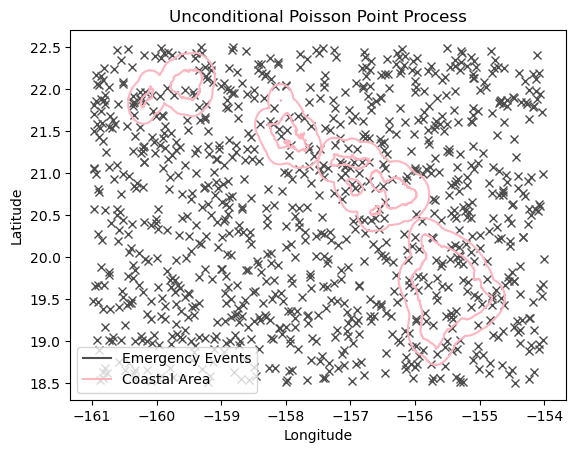

In [51]:
# plot the map
for point in emergency_events.geoms:
    lat, lon = point.x, point.y
    plt.plot(lon, lat, c=(.3, .3, .3), marker='x')
    
plt.plot([], [], c=(.3, .3, .3), label='Emergency Events')

for poly in coastal.geoms:
    lat, lon = poly.exterior.xy
    plt.plot(lon, lat, c=(1, .71, .75))
    for interior in poly.interiors:
        lat, lon = interior.xy
        plt.plot(lon, lat, c=(1, .71, .75))

plt.plot([], [], c=(1, .71, .75), label='Coastal Area')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Unconditional Poisson Point Process')
plt.show()

Then you need to keep only the points inside the coastal regions.

In [52]:
emergency_events = emergency_events.intersection(coastal)
print('Number of Points Remaining: {:d}'.format(len(emergency_events.geoms)))

Number of Points Remaining: 103


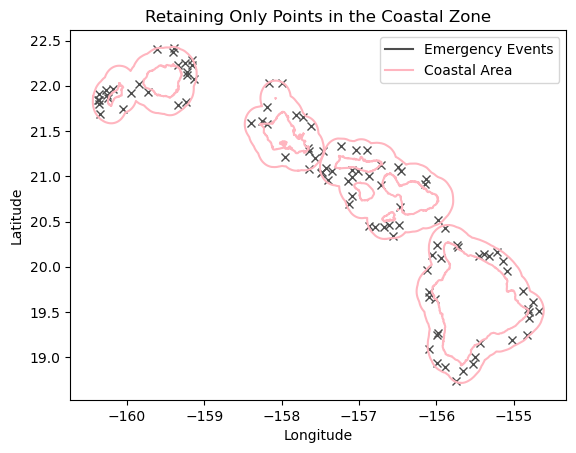

In [53]:
# plot the map
for point in emergency_events.geoms:
    lat, lon = point.x, point.y
    plt.plot(lon, lat, c=(.3, .3, .3), marker='x')

plt.plot([], [], c=(.3, .3, .3), label='Emergency Events')

for poly in coastal.geoms:
    lat, lon = poly.exterior.xy
    plt.plot(lon, lat, c=(1, .71, .75))
    for interior in poly.interiors:
        lat, lon = interior.xy
        plt.plot(lon, lat, c=(1, .71, .75))

plt.plot([], [], c=(1, .71, .75), label='Coastal Area')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Retaining Only Points in the Coastal Zone')
plt.show()

These are the simulated emergency events that your helicopters will need to respond to. Keep the set of emergencies that you use fixed for both scenarios (A) and (B) so that you can be sure that all changes in your results are caused by your policy proposal and not the data changing.

### 2.5.2. Plot your helicopters' paths under the two scenarios.

Plot a two subplot figure displaying the path of your helicopters under scenarios (A) and (B) described above (one scenario for each subplot). For each scenario and for each emergency event, find the closest heliport and assume that the rescuing helicopter is dispatched from that heliport (since it makes sense to dispatch a helicopter from the nearest heliport). In scenario (A), there is only one heliport that can be used. After a helicopter flies to an emergency site, it flies back to its original heliport. To visualize the distances that each helicopter flies, plot a line from each emergency site to the nearest heliport (under each scenario).

**Remember the function that we wrote a while ago to compute pairwise distances between points? As you can imagine, there is already an implementation of that in the standard packages (`scipy.spatial.distance.cdist`). We will be using that from now on. These functions will be more versatile and faster than the functions we've written.**

**Hint: recall `zip()` and `enumerate()` in Python**

Like list comprehension, `zip()` and `enumerate()` are considered to be crucial to a Pythonic coding style. `zip()` lets you loop over several lists (of the same length) at the same time, and `enumerate()` lets you loop over an iterable (e.g., a list) while counting. Observe the following code blocks.

In [33]:
# in Python, you can directly loop over iterables
# (e.g., lists, numpy.ndarrays)
for i in [5, 6, 7]:
    print(i)

5
6
7


In [34]:
# sometimes you want to loop over an iterable
# but you want to count at the same time
for i, s in enumerate(['a', 'b']):
    print(i)
    print(s)

0
a
1
b


In [35]:
# sometimes you want to loop over several iterables
# at the same time
for x, y in zip(['x0', 'x1'], ['y0', 'y1']):
    print(x)
    print(y)

x0
y0
x1
y1


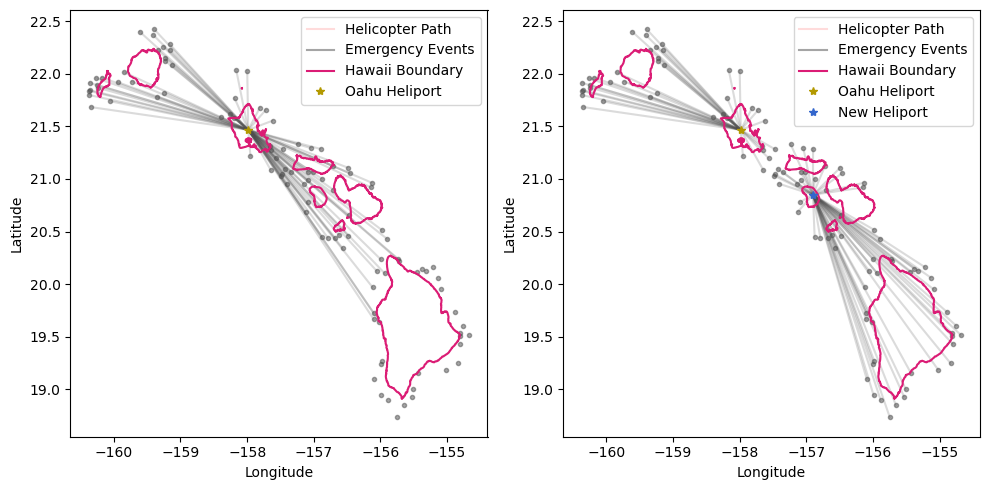

In [54]:
# TODO: WRITE YOUR CODE HERE
# scenario A
rescued = emergency_events.intersection(ellipse)
notrescued = emergency_events.difference(ellipse)

# scenario B
sites = [[oahu['lat'], oahu['lon']],
         [new['lat'], new['lon']]]
dist_b = cdist([[p.x, p.y] for p in emergency_events.geoms],
               sites,
               metric='euclidean')
dispatch_sites = [sites[i] for i in np.argmin(dist_b, axis=1)]

# initiate the maps
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))

# plot paths
for event in rescued.geoms:
    ax0.plot([oahu['lon'], event.y], [oahu['lat'], event.x], c=(.3, .3, .3), alpha=.2)
    
ax0.plot([], [], c=(1, .3, .3), alpha=.2, label='Helicopter Path')
for dispatch_site, emergency_event in zip(dispatch_sites, emergency_events.geoms):
    ax1.plot([dispatch_site[1], emergency_event.y],
             [dispatch_site[0], emergency_event.x], c=(.3, .3, .3), alpha=.2)
    
ax1.plot([], [], c=(1, .3, .3), alpha=.2, label='Helicopter Path')
# on both subplots
for ax in (ax0, ax1):
    for point in emergency_events.geoms:
        lat, lon = point.x, point.y
        ax.plot(lon, lat, c=(.3, .3, .3), marker='.', alpha=.5)
    ax.plot([], [], c=(.3, .3, .3), alpha=.5, label='Emergency Events')

    for poly in hawaii.geoms:
        lat, lon = poly.exterior.xy
        ax.plot(lon, lat, c=(.86, .11, .46))
    ax.plot([], [], c=(.86, .11, .46), label='Hawaii Boundary')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# plot helicopter sites
ax0.plot(oahu['lon'], oahu['lat'], c=(.7, .6, 0),
         marker='*', linestyle='None', label='Oahu Heliport')
ax1.plot(oahu['lon'], oahu['lat'], c=(.7, .6, 0),
         marker='*', linestyle='None', label='Oahu Heliport')
ax1.plot(new['lon'], new['lat'], c=(.2, .4, .8),
         marker='*', linestyle='None', label='New Heliport')
ax0.legend(loc='upper right')
ax1.legend(loc='upper right')
fig.tight_layout()
plt.show()

### 2.5.3. Plot the distribution of distances traveled

Create a two subplot figure illustrating the distribution of distances (using either histogram or density plots) flown by all rescuing helicopters under the two scenarios (one for each subplot). Be sure to consider the return trip part of the distance flown by a helicopter. **What is the average trip distance for each scenario?**

To simplify the calculation, you can convert degrees to kilometers by multiplying 111 km/degree. Given that we are not in a high-latitude region, this is reasonable, but bear in mind that this is just **a very rough approximation**.

Average Distance Travelled: Scenario A: 324.47 km; Scenario B: 283.58 km


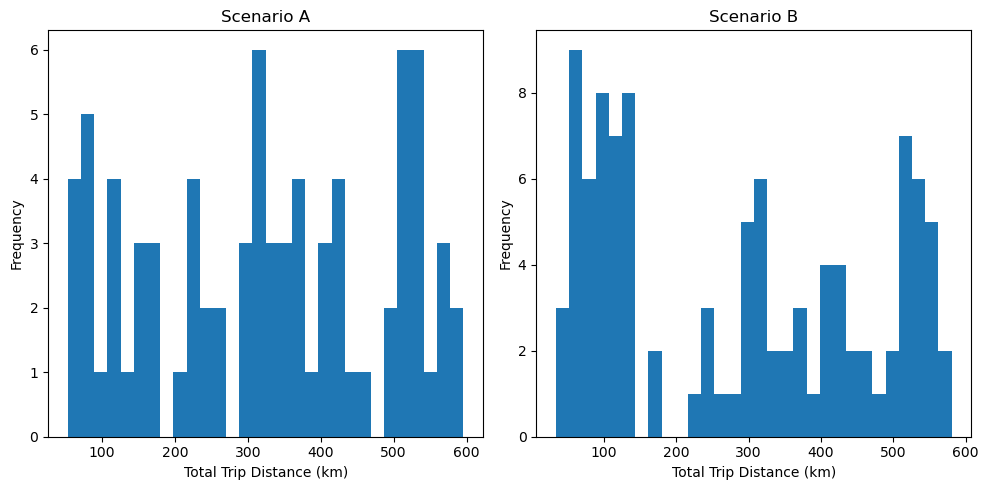

In [55]:
# TODO: WRITE YOUR CODE HERE
# scenario A
dist_a = cdist([[p.x, p.y] for p in rescued.geoms],
               [[oahu['lat'], oahu['lon']]],
               metric='euclidean')
dist_a = dist_a.squeeze(axis=1) * 2 * 111  # this is approximate

# scenario B
dist_b = np.min(dist_b, axis=1) * 2 * 111  # this is approximate
print('Average Distance Travelled: Scenario A: {:.2f} km; Scenario B: {:.2f} km'
      .format(dist_a.mean(), dist_b.mean()))

# plot the maps
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.hist(dist_a, bins=30)
ax1.hist(dist_b, bins=30)
for ax in (ax0, ax1):
    ax.set_xlabel('Total Trip Distance (km)')
    ax.set_ylabel('Frequency')
ax0.set_title('Scenario A')
ax1.set_title('Scenario B')
fig.tight_layout()
plt.show()

### 2.5.4. Calculate costs

Assuming it costs \\$30 per 1 km of helicopter travel and \\$37,000 for each emergency that does not get rescued (since in scenario A there is not complete coverage - this is the average cost of losing the boat and additional hospital care), **what is the total cost of operating the rescue system under the two scenarios for your full sample of simulated emergencies (which occurred over a year)? In addition to providing full coverage of Hawaii's coastal waters, how much money did your proposal save?**

In [57]:
# TODO: WRITE YOUR CODE HERE
cost_a = 30 * dist_a.sum() + 37000 * len(notrescued.geoms)
cost_b = 30 * dist_b.sum()
print('Cost in Scenario A: ${:.0f}; Cost in Scenario B: ${:.0f}; Savings: ${:.0f}'
      .format(cost_a, cost_b, cost_a - cost_b))

Cost in Scenario A: $1656990; Cost in Scenario B: $876260; Savings: $780730


## 3. Obtaining and Plotting New Data

In this short exercise, we'll obtain new map data from the internet and you'll import it to Python so it can be displayed.

### 3.1. Download the data

Download the shapefile describing the administrative boundaries for a single country from [here](http://www.diva-gis.org/Data). Pick any country you want under the "Country Level" data page. The shapefile is actually not a single file, but a collection of files that will all be downloaded in a zip file. For now, just focus on boundaries at the lowest administrative level i.e. national boundaries (in the zip file, these are denoted "adm0" which stands for "administrative level 0"). This site also has many subnational boundary files that are free to use and may useful to you in your future work, although we won't use any right now. Unzip the folder that you download into your working directory. You will see several files types (e.g. `.prj` or `.sbx`), don't delete any of them but you only need to interact with the `.shp` file since this is the main shapefile.

### 3.2. Read the data

Import the shapefile data to Python with `geopandas.read_file()`. Call your data `df`.

In [60]:
# TODO: WRITE YOUR CODES HERE
# I will demonstrate with US data
df = gpd.read_file('USA_adm/USA_adm0.shp')

In [61]:
# show the data frame
df

,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,244,USA,United States,238,USA,United States,UNITED STATES,United States of America,United States,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-155.84998 20.26800, -155.8494..."


We are now entering `geopandas` territory. The `geopandas` package is built upon the insight that a shapefile is essentially a data frame. A shapefile typically consists of a collection of multipolygons, and each multipolygon has a number of attributes associated with them. For example, we could have a number of states in the US, and for each state, we want to record their population, average GDP, etc.

A `geopandas.GeoDataFrame` thus builds on the `pandas.DataFrame` class, and it inherits almost all of the functionality implemented for `pandas.DataFrame`s (aka you can treat it like a pandas DataFrame). The only difference is that there is a new special column in each GeoDataFrame named `'geometry'` (view it with `df.geometry` or `df['geometry']`!). Each geometry is a shapely MultiPolygon object, so this package builds on shapely, too.

### 3.3. Plot the shapefile

Create a new figure and plot the border ("adm0") of your selected country. Make it pretty. Consider using the following command: `df.plot()`.
You can read more about this function [here](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) and [here](https://geopandas.org/en/stable/docs/user_guide/mapping.html).

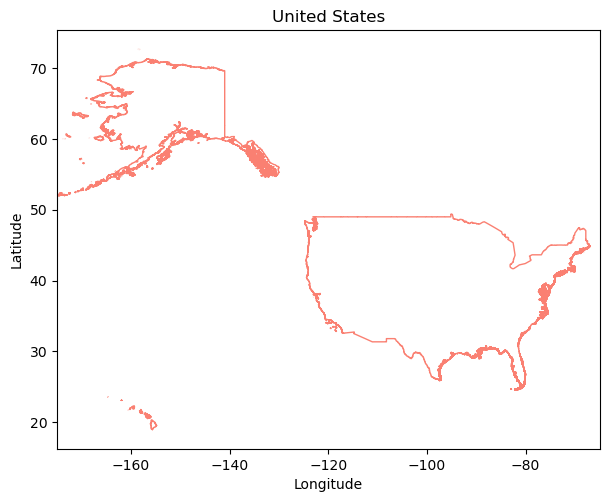

In [62]:
# TODO: WRITE YOUR CODES HERE
fig, ax = plt.subplots(figsize=(7, 7))
df.plot(ax=ax, color='white', edgecolor='salmon')
ax.set_xlim((-175, -65))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('United States')
plt.show()

You will likely notice that the codes for the second problem in this lab are tedious and hard to read (with lots of repetitions). Whereas in this problem they are extremely short, tidy and readable. In the second problem, in order to plot a collection of polygons, we have to first extract the coordinates of these polygons. We then have to loop through the exterior of each polygon, as well as the interiors of these polygons (wasn't that painful?). We then call a function to plot the lines or fill the polygon with a certain color. We also need to be super careful so as not to mess up the dimensions (lat-lon versus x-y).

Here, we just call `df.plot()` and `geopandas` does all the work for us. This illustrates nicely that Python and many of its modules are designed to be "high-level", i.e., close to human language. The downside of this is that sometimes it is hard for the users to figure out what exactly is being done by these methods and it can sometimes be challenging to generate highly customized results. We designed problem 2 so that you will see the mechanics of plotting polygons and have a better understanding of the data structure, but from now on, we will be using `geopandas` to handle most of our shapefiles. We are introducing just a small fraction of all the `geopandas` functionality and you will discover much more of it in the future.

## 4. NSA
Load the dataset `Lab4_network.p`. This data describes a social network of 35 friends based on their location and their friendships, which you (a National Security Agency analyst) have been monitoring through their telephone conversations.

### 4.1. Plot the social network.

**Plot the location of each individual as a node.** Make the colors of the nodes reflect the age of the individual somehow (e.g. you can use a single cutoff and make the nodes two colors, you could use multiple cutoffs and more colors, or you can make the color vary smoothly with age using RGB vectors that are a function of age). `L` is the connectivity matrix of friendships (the indices are the same as for the location vectors). **If two individuals are friends, add a line between them in your figure.**

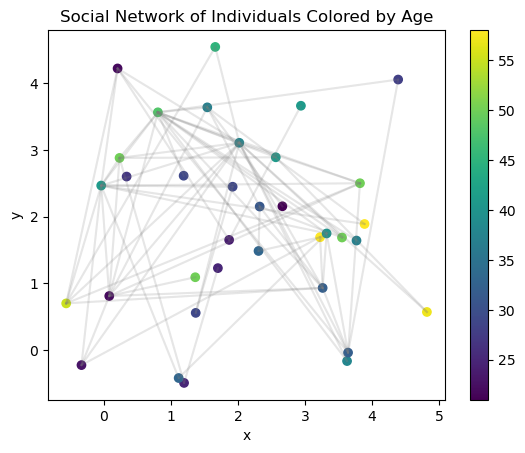

In [63]:
# TODO: WRITE YOUR CODES HERE
with open('Lab4_network.p', 'rb') as f:
    d = pickle.load(f)
x = d['x']
y = d['y']
L = d['L']
age = d['age']
plt.scatter(x, y, c=age)
for i in range(35):
    for j in range(35):
        if L[i, j]:
            plt.plot([x[i], x[j]], [y[i], y[j]],
                     color=(.5, .5, .5, .1))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Social Network of Individuals Colored by Age')
plt.show()

### 4.2. Analyze a specific person's connections

Suppose individual number 4 (i = 4, this will be the fifth observation since we started counting from 0) begins to act suspiciously and you think you had better investigate all of individual 4's friends. Which individuals do you investigate? Make a second plot that only shows individuals that are linked to to individual 4. If two individuals are friends, add a line between them in your figure. Label each node with his/her index number on the figure (hint: use `plt.text()`). Also be sure to label or mark individual 4 uniquely.

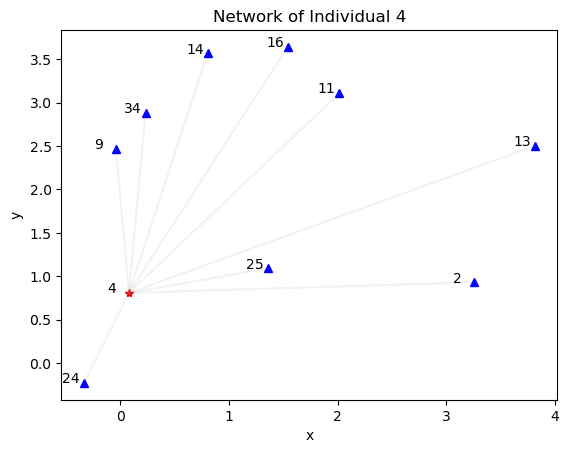

In [64]:
# TODO: WRITE YOUR CODES HERE
plt.plot(x[4], y[4], 'r*')
plt.text(x[4] - 0.2, y[4], '4')
for i in range(35):
    if L[i, 4] and i != 4:
        plt.plot(x[i], y[i], 'b^')
        plt.plot([x[i], x[4]], [y[i], y[4]],
                 color=(.5, .5, .5, .1))
        plt.text(x[i] - 0.2, y[i], str(i))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Network of Individual 4')
plt.show()

## Congratulations!
You've finished this lab!

* **Please list everyone you worked on this assignment with outside of public Piazza discussions.**